# Project: 
### In this project there are high energy particules that hits a camera. We are trying to predict what particule that causes the rediation, I used different Machine Learnin models to do that.
The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore", category=FutureWarning) # this and the line above ignore the warnings
from sklearn.model_selection import train_test_split

# the code below is to ignore the tensorflow information's message
import os
import tensorflow as tf

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 = default, 1 = no INFO, 2 = no INFO or WARNING, 3 = no INFO, WARNING, or ERROR

2024-03-29 18:21:51.683749: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# dataset:

The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).
http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68

In [3]:
# This assign the column names to the dataset
col_name = ['fLength', 'fWide', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'Class']

In [4]:
# This read the data
df = pd.read_csv('magic04.data', names=col_name)
df.head()

,fLength,fWide,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
# this return 1 if is it a series and 2 if it a dataframe.
df['fLength'].ndim

1

In [6]:
# let's see the overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWide     19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  Class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [7]:
# this tells us how many rows and columns are in the dataset
df.shape

(19020, 11)

In [8]:
# this is the see the unique value in the column 'class'
df['Class'].unique()

array(['g', 'h'], dtype=object)

In [9]:
# This is to see the type of the data
df.dtypes

fLength     float64
fWide       float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
Class        object
dtype: object

In [10]:
# seen that we like to work with numbers, let's convert the 'Class' column into 0 or 1
df['Class'] = (df['Class'] == 'g').astype(int)
df.head()

,fLength,fWide,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


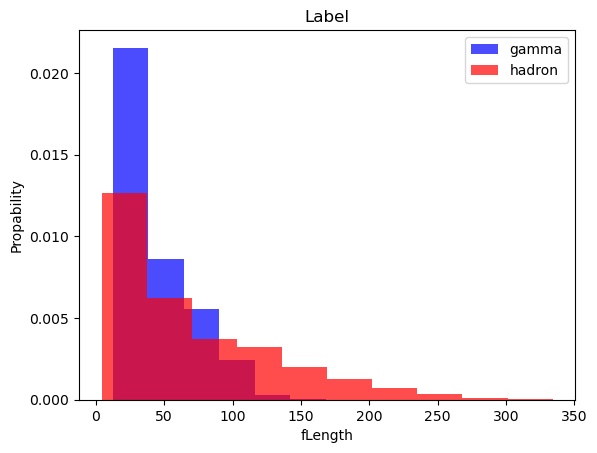

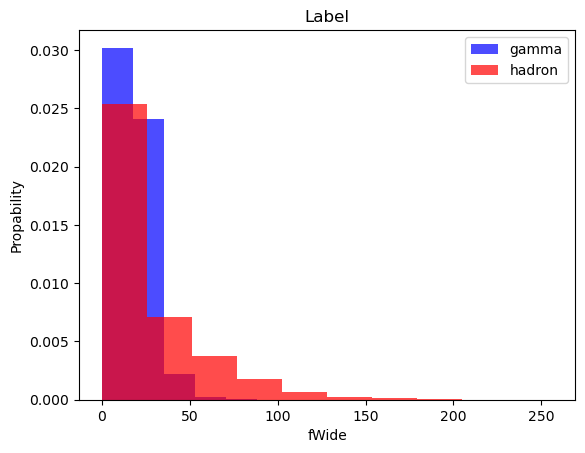

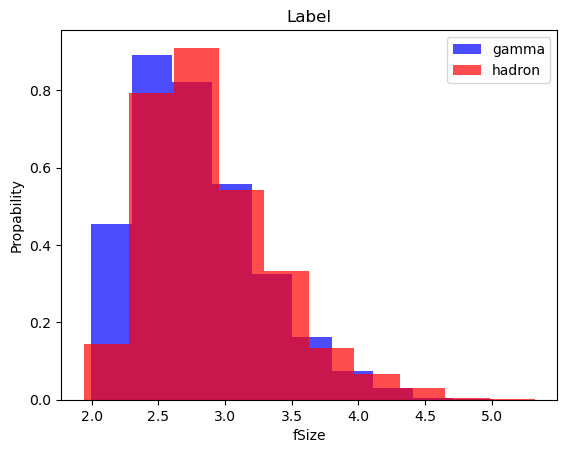

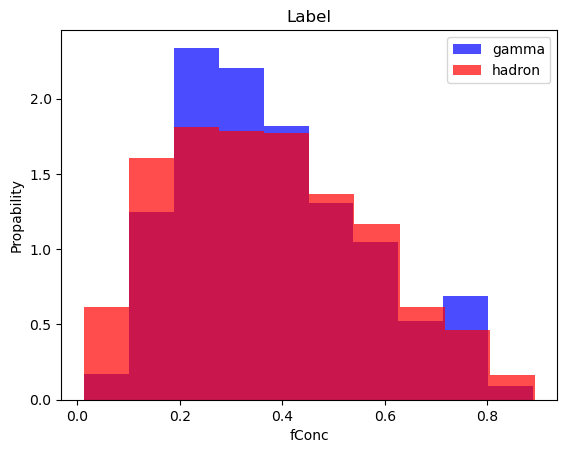

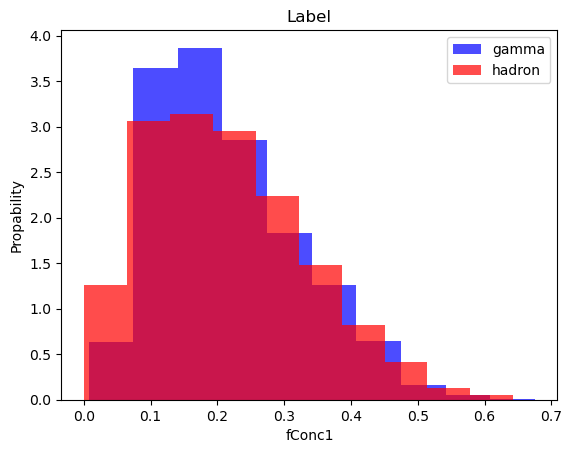

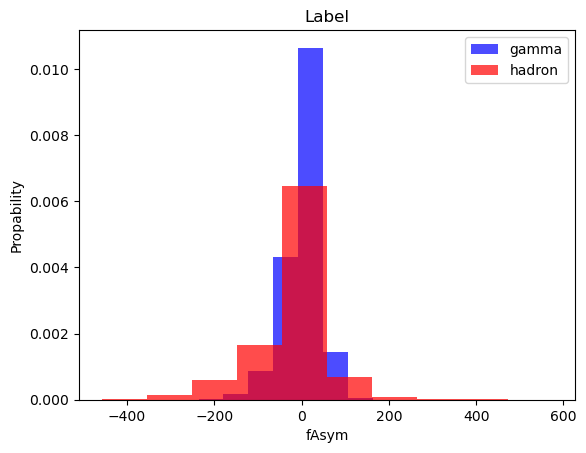

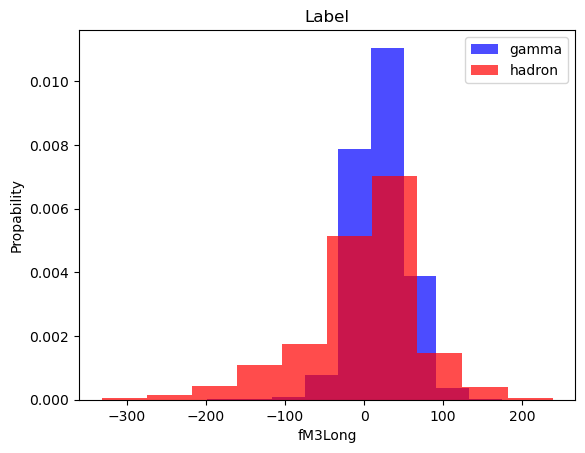

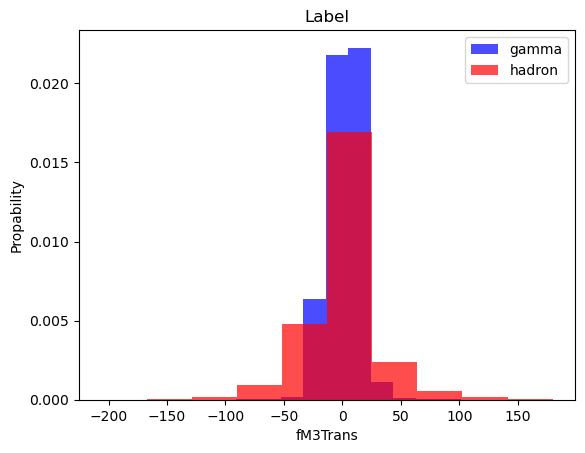

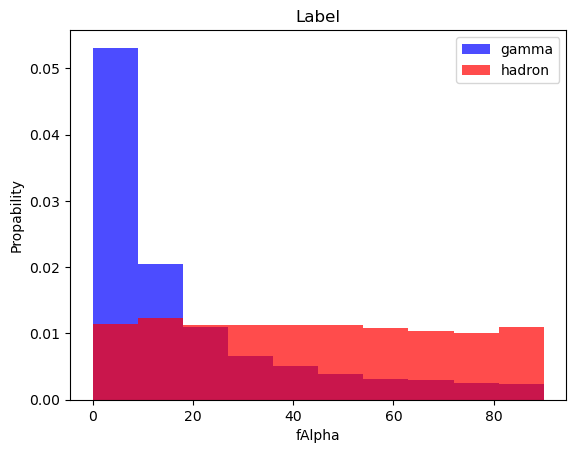

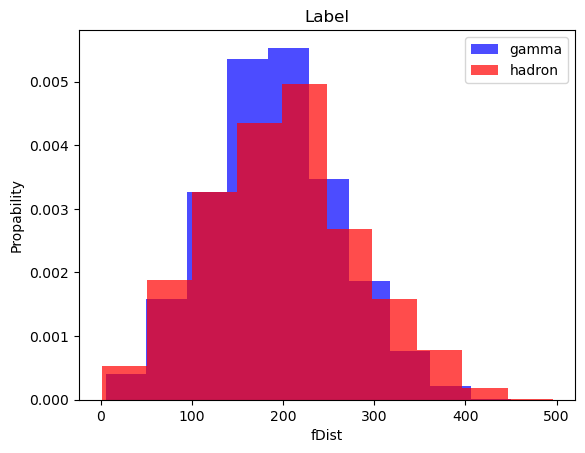

In [11]:
# this plot all the columns in the dataset where the 'class' column is 0 or 1.
for label in col_name[:-1]:
    plt.hist(df[df['Class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['Class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title('Label')
    plt.ylabel('Propability')
    plt.legend()
    plt.xlabel(label)
    plt.show()

In [12]:
import seaborn as sns

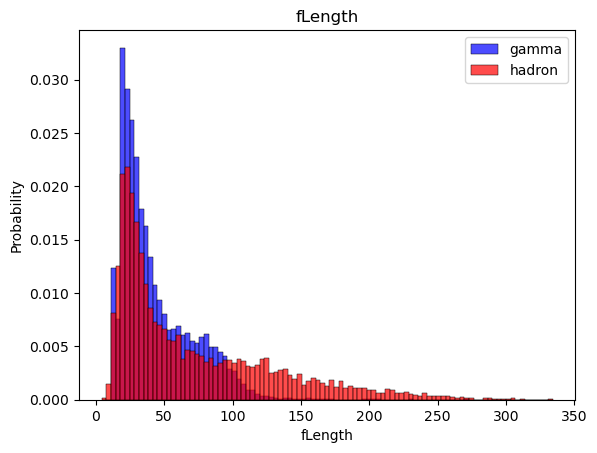

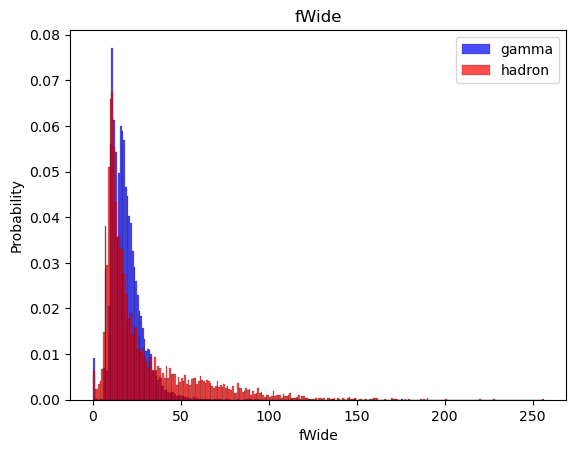

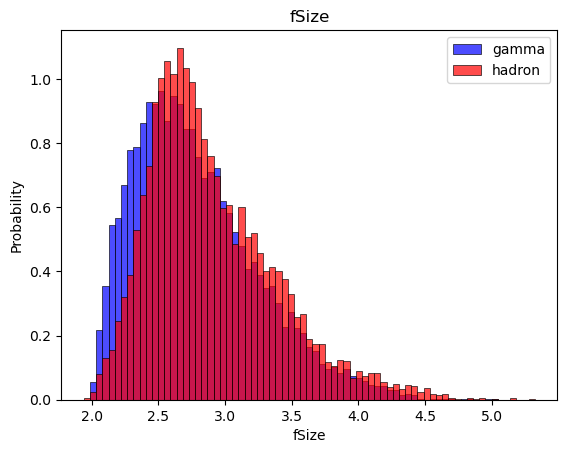

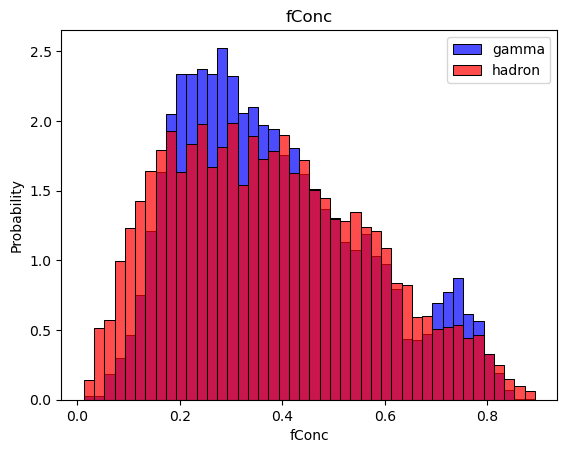

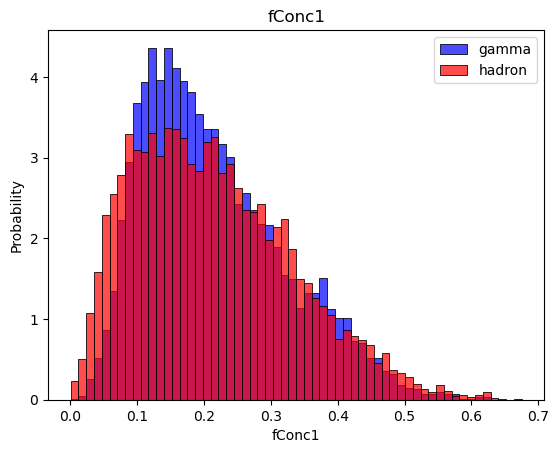

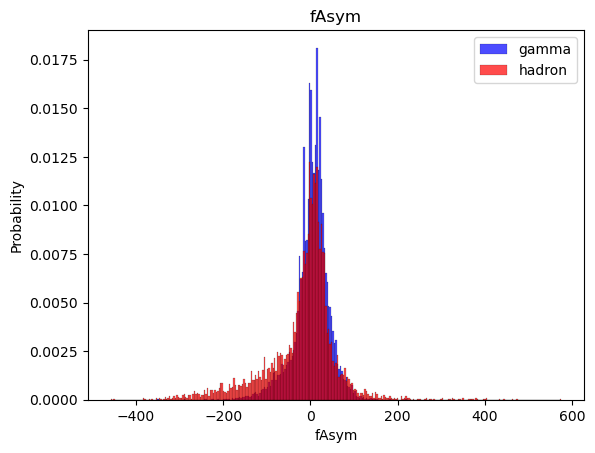

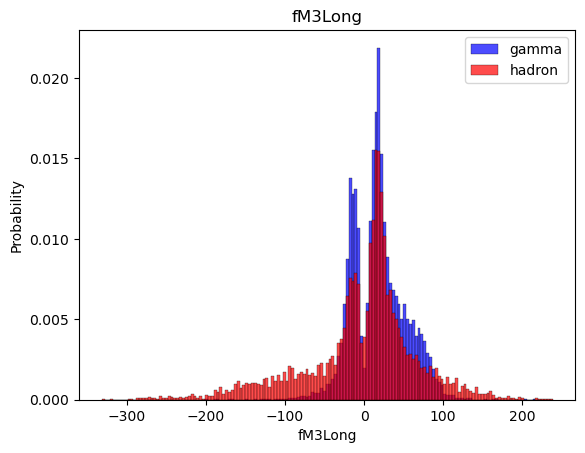

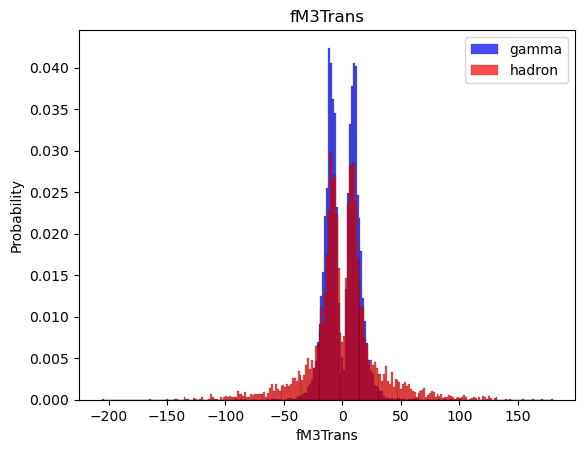

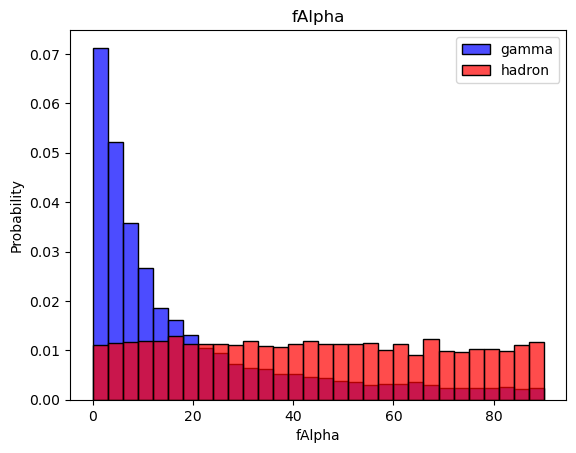

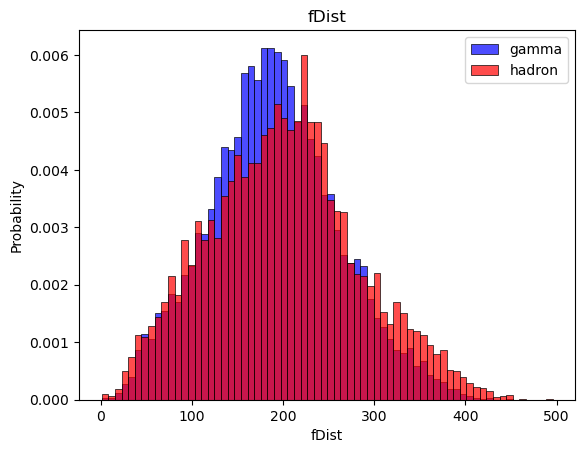

In [13]:
# this plot all the columns in the dataset where the 'class' column is 0 or 1 But it uses Seaborn instead.
for label in col_name[:-1]:
    # Use seaborn's histplot to plot histograms for each label/class combination
    sns.histplot(data=df, x=label, hue="Class", palette={1: "blue", 0: "red"}, alpha=0.7, common_norm=False, stat="density")
    plt.title(label)
    plt.ylabel('Probability')
    plt.legend(['gamma', 'hadron'])
    plt.show()

## Train, Validation, Test Dataset

In [14]:
# these are the import needed 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [15]:
# this is the train, validation, and test
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [16]:
# This creates a standarisation and it also evenlly distrubuted the data in the class column.
def scale_dataset(dataframe, oversample=False):
    # X = dataframe[dataframe.columns[:-1]].values
    # y = dataframe[dataframe.columns[-1]].values

    X = dataframe.iloc[:, :-1]  # Use .iloc to select columns by position, keeping it as DataFrame
    y = dataframe.iloc[:, -1]   # Select target

    scaler = StandardScaler()  # Initialize the scaler
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)  # Return a DataFrame
    
     # this is the condition to oversample
    if oversample:
        ros = RandomOverSampler()
        X_scaled, y = ros.fit_resample(X_scaled, y)

    # Convert back to DataFrame and Series to maintain structure
        X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
        y = pd.Series(y)

    
    data = np.hstack((X_scaled, np.reshape(y, (-1, 1))))  # this creates a stack and it scale X and y.

    return X_scaled, y

In [17]:
# this check to see the data is distrubuted in the 'class' column. We see that the data is not evenlly distributed.
# will will then oversample it.
print(len(train[train['Class'] == 0]))  # Count rows where 'Class' is 0 (gamma)
print(len(train[train['Class'] == 1]))  # Count rows where 'Class' is 1


3985
7427


In [18]:
# this load the scaler
X_train, y_train = scale_dataset(train, oversample=True)


In [19]:
# this check the lenght of the training set.
len(y_train)

14854

In [20]:
# this check how many 1 we  have in the class column
sum(y_train == 1)


7427

In [21]:
# this check how many 0 we have in the class column.
sum(y_train == 0)

7427

In [22]:
# Load the scaler and apply transformations/oversampling
# The data is now proprely formated

X_train, y_train = scale_dataset(train, oversample=True)
X_valid, y_valid = scale_dataset(valid, oversample=False)
X_test, y_test = scale_dataset(test, oversample=False)

In [23]:
X_test

,fLength,fWide,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
3687,-0.787935,-0.524514,-1.025638,0.831073,1.098909,-0.175033,-0.488442,-0.309131,-0.334134,-0.736226
3871,-0.565628,-0.675265,-0.988868,0.620747,0.307032,-0.119207,-0.442764,-0.179578,-0.848540,-0.617325
1920,-0.348511,-0.155541,-0.403069,-0.667229,-0.692434,1.105190,0.037598,-0.366411,-0.755056,0.082604
2330,-0.681423,-0.437537,-0.617625,0.229367,-0.022246,0.686901,-0.512070,0.576351,-0.539558,-1.767236
17772,0.113543,0.686782,0.485241,-0.395648,-0.411474,0.862559,0.772292,1.143877,-0.426601,0.617875
...,...,...,...,...,...,...,...,...,...,...
7874,-0.320902,-0.094448,0.286144,-0.510026,-0.311259,0.218280,0.431259,-0.963355,-0.965198,-0.712398
11604,-0.402829,-0.001156,0.159332,-0.615189,-0.637852,0.446731,-0.515866,-0.681955,-0.047843,0.265186
17237,-0.281222,-0.458567,0.117549,-0.165265,-0.236992,0.456980,0.158267,-0.475306,2.083345,-1.167605
16415,-0.516062,-0.667922,-0.583781,0.359466,0.085127,-0.015923,0.290082,0.072126,1.528298,0.112590


## Now let use different Machine Learning models to apply on our data

# First Model: KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [25]:
# this is how to perform the KNN method
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
# this is the predicted values
y_pred = knn_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [27]:
# And this is the truth values
y_test

3687     1
3871     1
1920     1
2330     1
17772    0
        ..
7874     1
11604    1
17237    0
16415    0
15182    0
Name: Class, Length: 3804, dtype: int64

In [28]:
# this print the classification reporty
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1320
           1       0.86      0.86      0.86      2484

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Second Model: Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
# this is how to perform the NB method
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [31]:
y_pred = nb_model.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.51      1320
           1       0.74      0.90      0.81      2484

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# Third Model: Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
# this is how to perform the LR method
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [35]:
# this is the model prediction
y_pred = lg_model.predict(X_test)

In [36]:
# this print the classification reporty
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1320
           1       0.85      0.82      0.84      2484

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Forth Model: Support Vector Machine (SVM)

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [38]:
# this is how to perform the SVM method
clf_svm = SVC()
clf_svm.fit(X_train, y_train)

SVC()

In [39]:
y_pred = clf_svm.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1320
           1       0.89      0.89      0.89      2484

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [41]:
# This evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.860410094637224


# Fifth Model: Neural Net For Classification

In [42]:
import tensorflow as tf

In [43]:

def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoc')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.legend()
    ax1.grid(True)

    # this is the accuracy plot
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoc')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    plt.show()
    

In [44]:
plot_history(history)

NameError: name 'history' is not defined

In [ ]:
# this is a function that defines the Neural Network

def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
]) 

    # Compile the model inside the function, using the lr parameter
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

    # this train the Neural Net model
    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return nn_model, history

## 

In [ ]:
# Initialize the minimum validation loss to infinity so that the validation loss is less than this value.
least_val_loss = float('inf')

best_model = None # Initialize the best model to None. This will later hold the model with the lowest validation loss.

epochs = 100 # Define the total number of epochs to train each model configuration.

# Iterate over different configurations of hyperparameters.
for num_nodes in [16, 32, 64]:  # Number of nodes in each layer.
    for dropout_prob in [0, 0.2]:  # Dropout probability to prevent overfitting.
        for lr in [0.001, 0.01]:  # Learning rate for the optimizer.
            for batch_size in [32, 64, 128]:  # Batch size for training.
                # Print the current configuration being tested.
                print(f"{num_nodes} node, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                
                # Train the model with the current set of hyperparameters.
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                
                # Assuming plot_history is a function that plots the training history.
                plot_history(history)
                
                # Evaluate the current model on the validation set and get the validation loss.
                val_loss = model.evaluate(X_valid, y_valid)[0]
                
                # If the current model's validation loss is lower than the least validation loss encountered so far,
                # update least_val_loss with the current model's validation loss and update best_model with the current model.
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    best_model = model

In [ ]:
least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1, 1)

In [ ]:
y_pred

In [ ]:
print(classificition_report(y_test, y_pred))